### This notebook contains EDA analysis

### 1. Overview & Basic Info

In [1]:
import pandas as pd

In [3]:
# Load csv
df = pd.read_csv("../data/parsed/pune/pune_listings_cleaned.csv")
df.head()

,price_num,bhk_number,area_sqft,price_per_sqft,locality,city,listing_url,price_lakhs
0,6500000,2,834,7794,Dhanori,Pune,https://www.magicbricks.com/bramha-sky-city-ph...,65.0
1,7000000,2,800,8750,Ravet,Pune,https://www.magicbricks.com/lotus-laxmi-ravet-...,70.0
2,2500000,1,400,6250,Dhankawadi,Pune,https://www.magicbricks.com/propertyDetails/40...,25.0
3,13500000,3,1160,11638,Bhugaon,Pune,https://www.magicbricks.com/propertyDetails/3-...,135.0
4,5000000,2,715,6993,Tingre Nagar,Pune,https://www.magicbricks.com/choice-group-goodw...,50.0


In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 2820
Columns: 8


In [ ]:
df.columns.tolist()

['price_num',
 'bhk_number',
 'area_sqft',
 'price_per_sqft',
 'locality',
 'city',
 'listing_url',
 'price_lakhs']

In [7]:
df.dtypes

price_num           int64
bhk_number          int64
area_sqft           int64
price_per_sqft      int64
locality           object
city               object
listing_url        object
price_lakhs       float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price_num       2820 non-null   int64  
 1   bhk_number      2820 non-null   int64  
 2   area_sqft       2820 non-null   int64  
 3   price_per_sqft  2820 non-null   int64  
 4   locality        2820 non-null   object 
 5   city            2820 non-null   object 
 6   listing_url     2820 non-null   object 
 7   price_lakhs     2820 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 176.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_num,2820.0,1.222075e+07,1.315897e+07,800000.0,4700000.00,8179999.5,14825000.00,150000000.0
bhk_number,2820.0,2.239716e+00,9.375596e-01,1.0,2.00,2.0,3.00,10.0
area_sqft,2820.0,9.696972e+02,6.150243e+02,180.0,619.75,814.5,1138.00,7500.0
price_per_sqft,2820.0,1.104253e+04,4.815201e+03,2400.0,7587.25,10257.0,13553.25,40732.0
price_lakhs,2820.0,1.222075e+02,1.315897e+02,8.0,47.00,81.8,148.25,1500.0


In [10]:
print("Unique BHK values:", df['bhk_number'].unique())
print("Unique Localities:", len(df['locality'].unique()))
print("Cities:", df['city'].unique())

Unique BHK values: [ 2  1  3  4  6  5 10  8]
Unique Localities: 382
Cities: ['Pune']


In [11]:
df.isna().sum()

price_num         0
bhk_number        0
area_sqft         0
price_per_sqft    0
locality          0
city              0
listing_url       0
price_lakhs       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

### 2. Price Analysis

In [13]:
df['price_lakhs'].describe()

count    2820.000000
mean      122.207518
std       131.589720
min         8.000000
25%        47.000000
50%        81.800000
75%       148.250000
max      1500.000000
Name: price_lakhs, dtype: float64

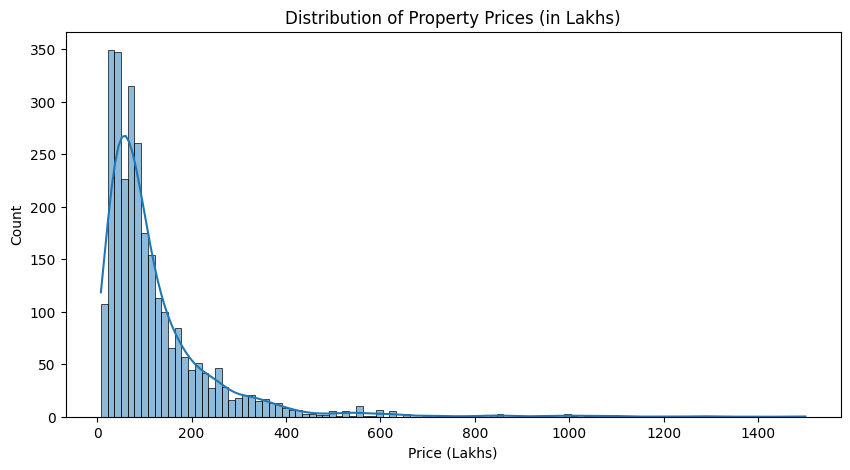

In [14]:
#Price Distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['price_lakhs'], kde=True)
plt.title("Distribution of Property Prices (in Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()


Analysis : The price distribution is heavily right-skewed, with the majority of listings priced between 50–150 Lakhs. This reflects the typical mid-segment housing market in Pune. Very few properties exceed 300 Lakhs, forming a long tail of luxury properties up to 15 Crore.

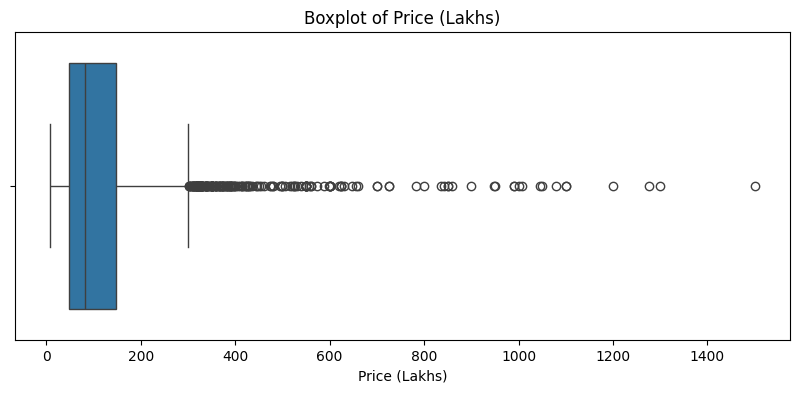

In [15]:
# Boxplot for outliers in price column
plt.figure(figsize=(10,4))
sns.boxplot(x=df['price_lakhs'])
plt.title("Boxplot of Price (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.show()

Boxplot Analysis : The price boxplot shows a highly right-skewed distribution. The interquartile range (IQR) lies roughly between 40–150 Lakhs, indicating that most properties fall into the mid-segment range. The median price is around 75–90 Lakhs.

Outliers : A very long tail of outliers extends up to 15 Crores, which shows that luxury and premium properties in Pune rather than data errors. The whiskers suggest that values above ~2–2.5 Crores are statistically outliers, but they remain valid in the real estate context.

In [16]:
# Price range buckets
bins = [0, 50, 75, 100, 150, 200, 500, 1000, 1500]
labels = ["0-50L", "50-75L", "75-100L", "100-150L", "150-200L", "200-500L", "500-1000L", "1000-1500L"]

df['price_bucket'] = pd.cut(df['price_lakhs'], bins=bins, labels=labels, include_lowest=True)

df['price_bucket'].value_counts().sort_index()


price_bucket
0-50L         798
50-75L        500
75-100L       414
100-150L      435
150-200L      235
200-500L      377
500-1000L      51
1000-1500L     10
Name: count, dtype: int64

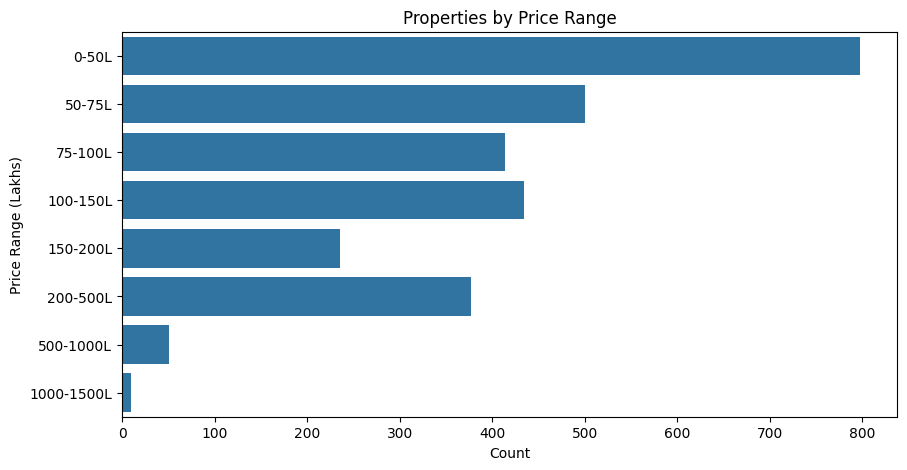

In [ ]:
#Visulazing buckets of price
plt.figure(figsize=(10,5))
sns.countplot(y='price_bucket', data=df, order=labels)
plt.title("Properties by Price Range")
plt.xlabel("Count")
plt.ylabel("Price Range (Lakhs)")
plt.show()

Countplot analysis : The price range analysis shows that Pune's real estate market is dominated by budget and mid-segment homes. The 0–50L bracket has the largest supply, followed by strong availability in the 50–150L range which covers most 2BHK units. There is a drop in the 150–200L category but a notable increase again in the 200–500L range, indicating strong demand and supply in upper-mid-segment and luxury properties. Ultra-luxury homes above 5 Cr are very rare.


3. Area(Sqft) Analysis

In [3]:
import pandas as pd

In [4]:
# Load csv
df = pd.read_csv("../data/parsed/pune/pune_listings_cleaned.csv")
df.head()

,price_num,bhk_number,area_sqft,price_per_sqft,locality,city,listing_url,price_lakhs
0,6500000,2,834,7794,Dhanori,Pune,https://www.magicbricks.com/bramha-sky-city-ph...,65.0
1,7000000,2,800,8750,Ravet,Pune,https://www.magicbricks.com/lotus-laxmi-ravet-...,70.0
2,2500000,1,400,6250,Dhankawadi,Pune,https://www.magicbricks.com/propertyDetails/40...,25.0
3,13500000,3,1160,11638,Bhugaon,Pune,https://www.magicbricks.com/propertyDetails/3-...,135.0
4,5000000,2,715,6993,Tingre Nagar,Pune,https://www.magicbricks.com/choice-group-goodw...,50.0


In [5]:
df['area_sqft'].describe()

count    2820.000000
mean      969.697163
std       615.024306
min       180.000000
25%       619.750000
50%       814.500000
75%      1138.000000
max      7500.000000
Name: area_sqft, dtype: float64

Distribution of property area Histogram

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

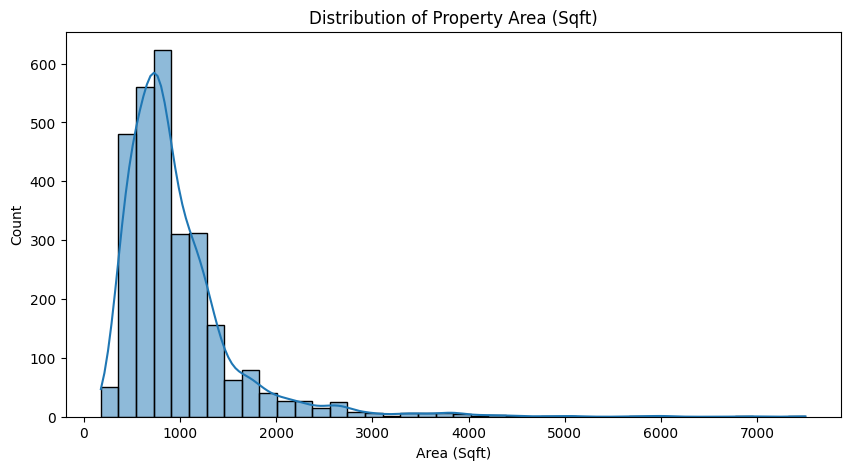

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['area_sqft'], bins=40, kde=True)
plt.title("Distribution of Property Area (Sqft)")
plt.xlabel("Area (Sqft)")
plt.ylabel("Count")
plt.show()

Histplot Analysis : Most properties fall within 700–1300 sqft, showing the dataset is dominated by mid-sized apartments (1–2 BHK).
The distribution is right-skewed, with only a small number of luxury units above 3000 sqft.
These few extreme values may represent villas or premium penthouses and can be reviewed separately.

### Price per Sqft Distribution

In [11]:
df['price_per_sqft'].describe()

count     2820.000000
mean     11042.529787
std       4815.200662
min       2400.000000
25%       7587.250000
50%      10257.000000
75%      13553.250000
max      40732.000000
Name: price_per_sqft, dtype: float64

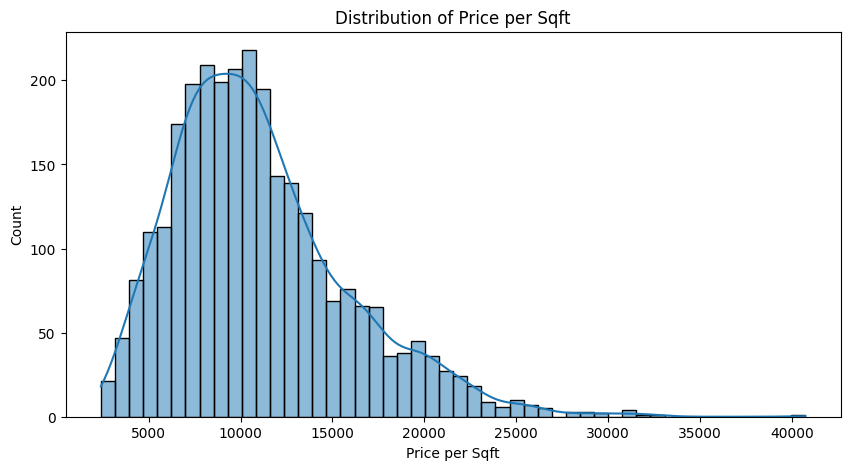

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Count")
plt.show()

The price per sqft distribution shows a strong concentration between ₹6,000–₹12,000/sqft, indicating that the dataset is dominated by mid-market properties.
The distribution is right-skewed, with a long tail extending toward ₹25,000–₹40,000/sqft, which shows the presence of premium and luxury projects.

### Top 10 Localities

In [13]:
top_localities = df['locality'].value_counts().head(10).index
top_localities

Index(['Wagholi', 'Kharadi', 'Wakad', 'Baner', 'Hadapsar', 'Hinjawadi',
       'Balewadi', 'Kondhwa', 'Undri', 'Chakan'],
      dtype='object', name='locality')

Boxplot

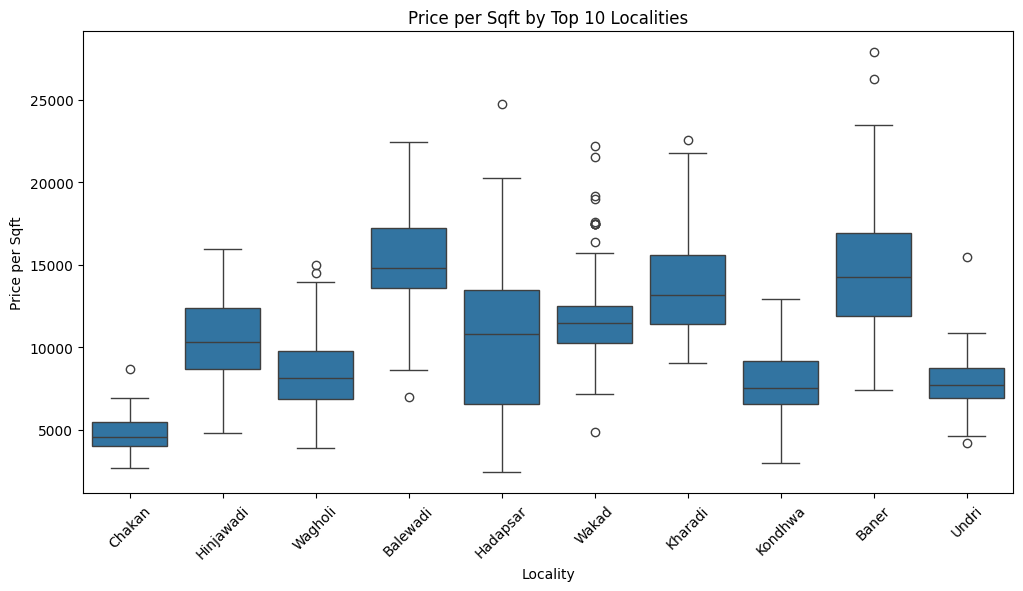

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['locality'].isin(top_localities)],
    x='locality',
    y='price_per_sqft'
)
plt.xticks(rotation=45)
plt.title("Price per Sqft by Top 10 Localities")
plt.xlabel("Locality")
plt.ylabel("Price per Sqft")
plt.show()


Boxplot Analysis : West Pune (Baner, Balewadi, Wakad) and East Pune (Kharadi) dominate the premium price-per-sqft segments.
Affordable markets include Chakan, Kondhwa, and Wagholi.
Hadapsar shows the widest pricing variation due to the presence of both old units and high-end township projects.
Baner stands out as the most premium locality with the highest outliers, while Chakan represents the most budget-friendly and stable area.

### Relationship between BHK & Price

In [16]:
df = df[df['bhk_number'] <= 6]

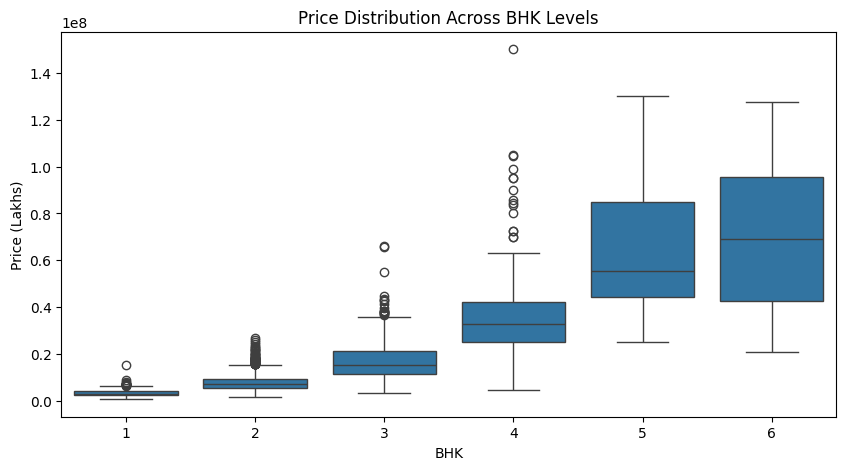

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bhk_number', y='price_num', data=df)
plt.title("Price Distribution Across BHK Levels")
plt.xlabel("BHK")
plt.ylabel("Price (Lakhs)")
plt.show()


Boxplot Analysis : Price generally increases with BHK count, showing a strong positive relationship.
1 and 2 BHK units form the stable budget and mid-income segments.
3 BHKs show the widest variability, driven by both old resale units and modern premium apartments.
4–6 BHK units belong to Pune’s luxury real-estate segment, with prices ranging from 2–10+ crore.

### Correlation Heatmap

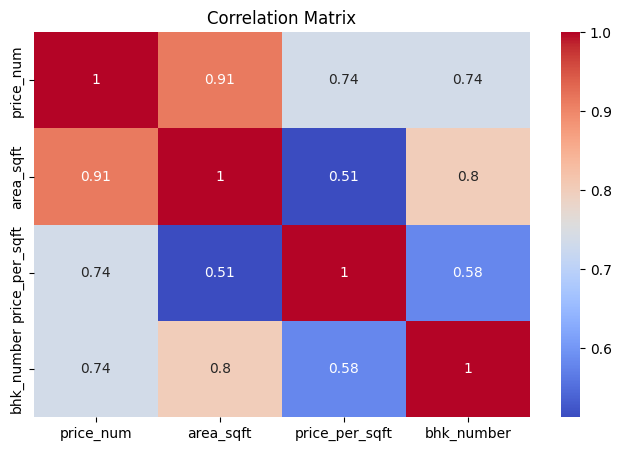

In [18]:
plt.figure(figsize=(8,5))
corr = df[['price_num', 'area_sqft', 'price_per_sqft', 'bhk_number']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Correlation Matrix Analysis : Price is primarily driven by area (0.91), followed by BHK (0.74).
Price per sqft also has a strong positive relationship with price, suggesting that premium localities show both higher per sqft pricing and higher total prices.
Area and BHK are strongly correlated (0.80), indicating clean data and typical real-estate patterns.
Overall, the correlations clearly reflect realistic market dynamics, with area emerging as the strongest price driver.